# Business Problem Understanding

## Backgound

California merupakan salah satu wilayah di Amerika Serikat yang memiliki market properti dengan tingkat demand yang tinggi. Pertumbuhan penduduk, aktivitas ekonomi dan daya tarik dari wilayah di California menjadikan harga rumah cenderung bervariasi antar distrik. Perbedaan tersebut tidak hanya dipengaruhi oleh lokasi geografis saja, tetapi juga oleh karakteristik demigrafis dan kondisi sosial ekonomi masyarakatnya. Untuk memahami bagaimana faktor-faktor tersebut berkaitan dengan nilai rumah, terdapat dataset yang bersumber dari sensus di California tahun 1990 yang menginformasikan karakteristik perumahan dan populasi di setiap distrik dan memberikan gambaran umum mengenai kondisi pemukiman dan potensi nilai properti pada masanya. 

Dalam praktiknya, menentukan nilai dari sebuah properti bukanlah hal yang sederhana dikarenakan banyak variabel yang saling berkaitan satu sama lain. Tanpa pemahaman yang memadai terhadap faktor-faktor tersebut, penilaian harga akan menjadi kurang akurat. Oleh karena itu, data historis diperlukan untuk menganalisis pola hubungan antara karakteristik wilayah dan nilai rumah. Meskipun data yang ada tidak dapat merepresentasikan nilai properti di California saat ini, melalui analisis yang dilakukan diharapkan menjadi dasar dalam merumuskan permasalahan bisnis serta tujuan analsis khususnya terkait prediksi nilai rumah di California berdasarkan wilayah dan sosial ekonomi yang tersedia di dalam dataset.

## Problem Statement

Harga properti di California memiliki variasi yang signifikan antar distrik yang dipengaruhi oleh beberapa faktor. Namun, hubungan antar faktor-faktor tersebut dengan nilai rumah tidak selalu mudah untuk dipahami secara langsung, terutama ketika jumlah variable yang terlibat cukup banyak dan saling berkaitan.

Dalam konteks ini, keterbatasan pemahaman terhadap pola data dapat menyebabkan kesulitan dalam memperkirakan nilai rumah secara objektif dan konsisten. Oleh karena itu, diperlukan pendekatan secara analitis yang mampu memanfaatkan data sensus properti di California tahun 1990 untuk mengidentifikasi pola dan hubungan antar karakteristik distrik dengan nilai median rumah. Permasalahan utama yang ingin dijawab dalam analisis ini adalah bagaimana membangun model prediksi yang dapat memperkirakan nilai rumah berdasarkan fitur-fitur yang tersedia, serta sejauh mana faktor tersebut berkontribusi terhadap variasi harga properti antar wilayah di California.

## Objectives

Tujuan dari analisis ini adalah untuk membangun dan mengevaluasi model ML yang mampu memprediksi nilai median di California berdasarkan karakteristik geografis, fisik, serta demografis yang tersedia pada dataset sensus properti California 1990. Selain itu, analisis ini juga bertujuan untuk mengidentifikasi fitur-fitur yang paling berpengaruh dalam menentukan nilai properti pada tingkat distrik. 

Melalui pendekatan ini, diharapkan hasil analisa dapat memberikan pemahaman yang lebih baik mengenai pola historis harga rumah di California.

## Modeling Approach & Evaluation Metrics

Selanjutnya, analisis data dilakukan untuk mengidentifikasi pola di berbagai fitur yang tersedia, sehingga dapat dipahami faktor-faktorapa saja yang membedakan nilai suatu properti dengan properti lainnya. Dengan memahami pola tersebut, langkah berikut adalah dengan membangun model regresi yang mampu memprediksi nilai properti berdasarkan karakteristik yang dimiliki. Model ini diharapkan dapat digunakan sebagai alat bantu prediksi harga, sehingga membantu pihak terkait dalam menentukan nilai properti secara lebih objektif dan konsisten berdasarkan data yang tersedia.

Penilaian evaluasi model dilakukan dengan menggunakan beberapa ukuran kesalahan prediksi, yaitu RMSE, MAE dan MAPE. Nilai yang lebih rendah pada ketiga metrik tersebut menunjukan bahwa model memiliki tingkat akurasi yang lebih baik dalam memprediksi nilai target sesuai dengan informasi yang tersedia pada fitur. Evaluasi tambahan memungkinkan untuk ditambahkan apabila model berbasis regresi linear. Secara keseluruhan, evaluasi pada permasalahan regresi ini mencakup penggunaan MAE, MSE, RMSE, MAPE, MSLE serta R-Squared sebagai dasar dalam membandingkan dan memilih model terbaik.

# Data Understanding & Exploratory Analysis

## Data Understanding

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
california = pd.read_csv('data_california_house.csv')
display(california.head(), california.tail())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


Dataset California Housing yang digunakan berisi data agregat tingkat distrik yang bersumber dari sensus California tahun 1990. Dataset ini memuat informasi geografis, demografis dan karakteristik perumahan yang direpresentasikan melalui berbagai fitur numerik dan kategorikal, yang dapat digunakan untuk memahami pola serta hubungan antara karakteristik wilayah dan nilai median rumah.

Setiap baris pada dataset merepresentasikan satu distrik sensus atau satu area tertentu di California. Nilai-nilai yang terdapat pada satu satu baris merupakan nilai agregrat atau statistik ringkasan dari seluruh rumah tangga dan penduduk yang ada pada area tersebut. Dengan demikian, dataset ini digunakan untuk menganalisis karakteristik wilayah secara keseluruhan, bukan perilaku atau kondisi individu secara spesifik.

| Atribut | Tipe Data | Deskripsi |
|---------|-----------|-----------|
| longitude | Float | Koordinat bujur lokasi distrik perumahan di California |
| latitude | Float | Koordinat lintang lokasi distrik perumahan di California |
| housing_median_age | Float | Usia median rumah di suatu distrik (dalam tahun) |
| total_rooms | Float | Jumlah total ruangan dari seluruh rumah di distrik tersebut |
| total_bedrooms | Float | Jumlah total kamar tidur dari seluruh rumah di distrik tersebut |
| population | Float | Jumlah total penduduk yang tinggal di distrik tersebut |
| households | Float | Jumlah total rumah tangga di distrik tersebut |
| median_income | Float | Pendapatan median rumah tangga di distrik tersebut (satuan terstandardisasi) |
| ocean_proximity | Object | Kategori kedekatan lokasi distrik terhadap laut |
| median_house_value | Float | Nilai median rumah di distrik tersebut sebagai variabel target |


## Exploratory Data Analysis

In [4]:
print(f'Jumlah baris dan kolom di dataset california: {california.shape}')
california.info()

Jumlah baris dan kolom di dataset california: (14448, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
unique_counts = california.nunique()

print(unique_counts)

longitude              806
latitude               836
housing_median_age      52
total_rooms           5227
total_bedrooms        1748
population            3498
households            1649
median_income         9797
ocean_proximity          5
median_house_value    3548
dtype: int64


In [6]:
# Check proporsi data yang missing (percentage)

(california.isna().sum() / len(california)) *100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

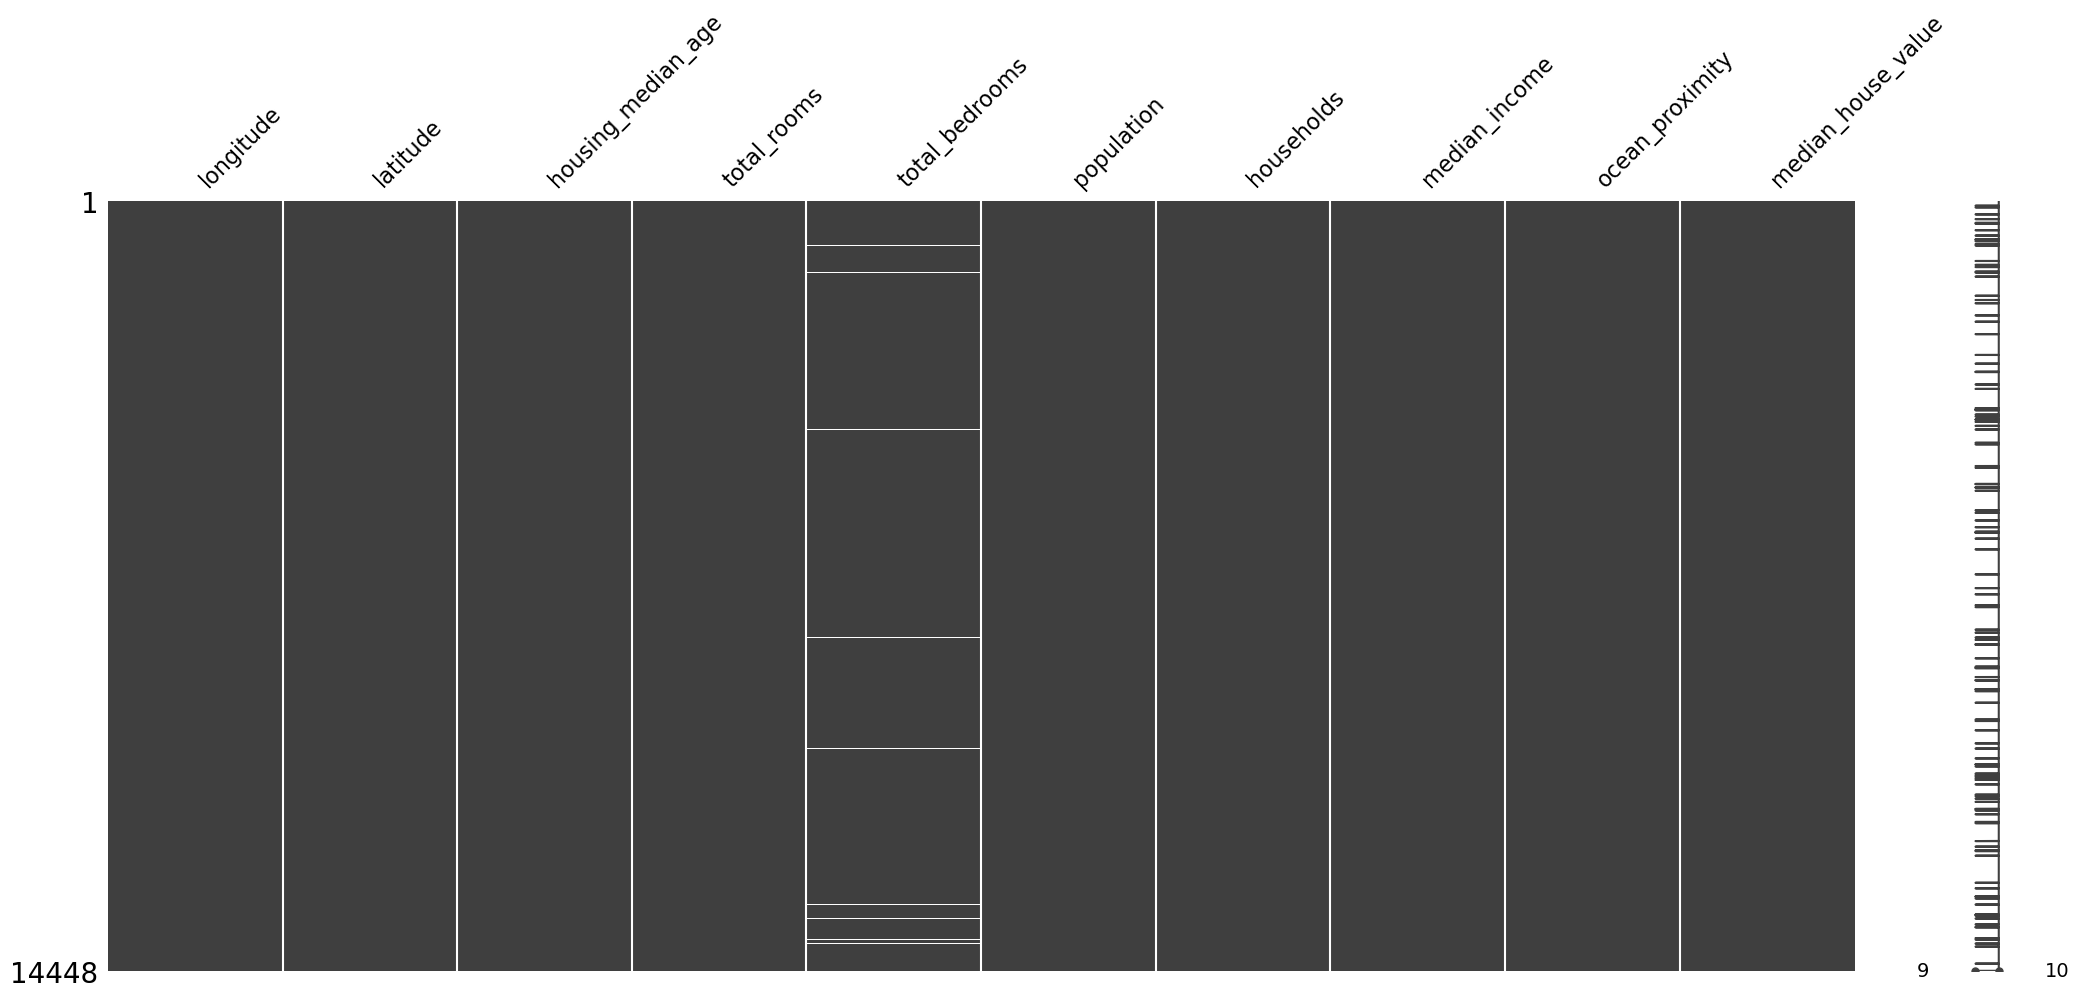

In [7]:
# Matrix plot — memperlihatkan posisi nilai yang hilang di dataset

msno.matrix(california)
plt.show()

In [10]:
print(f'Jumlah baris dan kolom di dataset california: {california.shape}')
print(f'Jumlah baris duplikat pada dataset: {california.duplicated().sum()}')


Jumlah baris dan kolom di dataset california: (14448, 10)
Jumlah baris duplikat pada dataset: 0


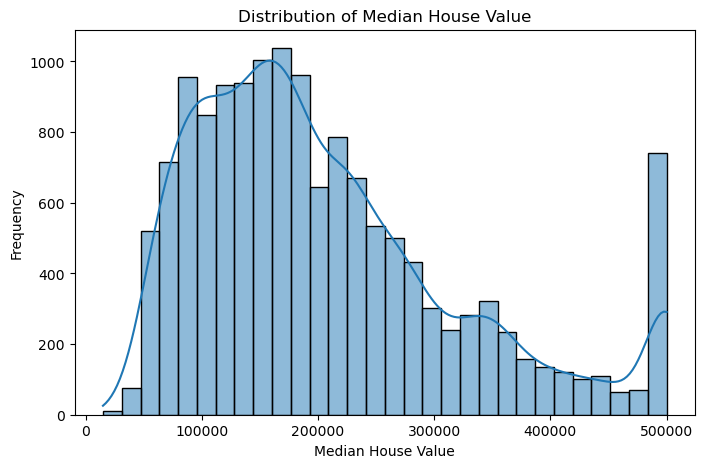

In [11]:

plt.figure(figsize=(8, 5))
sns.histplot(california['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


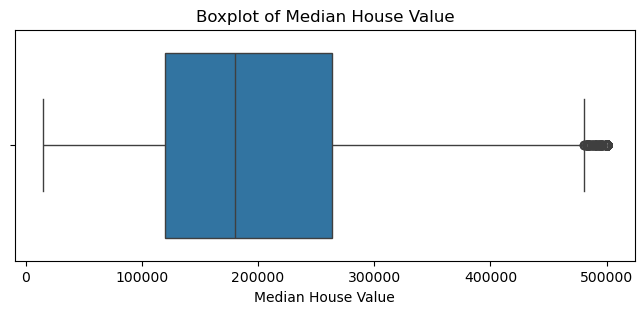

In [12]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=california['median_house_value'])
plt.title('Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.show()


Distribusi nilai median_house_value menunjukan pola right skewed distribution (positive skewed), di mana sebagian besar harga rumah terkonsentrasi pada rentang menengah, sementara hanya sedikit rumah yang memiliki nilai sangat tinggi. Terlihat adanya penumpukan pada nilai di batas maksimum, yang mengindikasikan kemungkinan penerapan batas atas pada pencatatan harga rumah di dataset. Boxplot juga menunjukan keberadaan outlier pada sisi kanan distribusi, menandakan variasi harga yang lebih besar pada rumah bernilai tinggi. Temuan ini menunjukan bahwa data tidak berdistribusi normal dan perlu diperhatikan pada tahap modeling berikutnya.

In [14]:
california.groupby('ocean_proximity')['median_house_value'].describe()


,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,6369.0,239652.436960,105751.529983,17500.0,164200.0,214800.0,288500.0,500001.0
INLAND,4576.0,125113.114510,70128.470962,14999.0,77675.0,108800.0,149500.0,500001.0
ISLAND,2.0,351100.000000,89943.982567,287500.0,319300.0,351100.0,382900.0,414700.0
NEAR BAY,1622.0,258512.974723,123794.049463,22500.0,162500.0,230800.0,347475.0,500001.0
NEAR OCEAN,1879.0,249775.384247,123091.200118,37500.0,150000.0,228600.0,325950.0,500001.0


,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


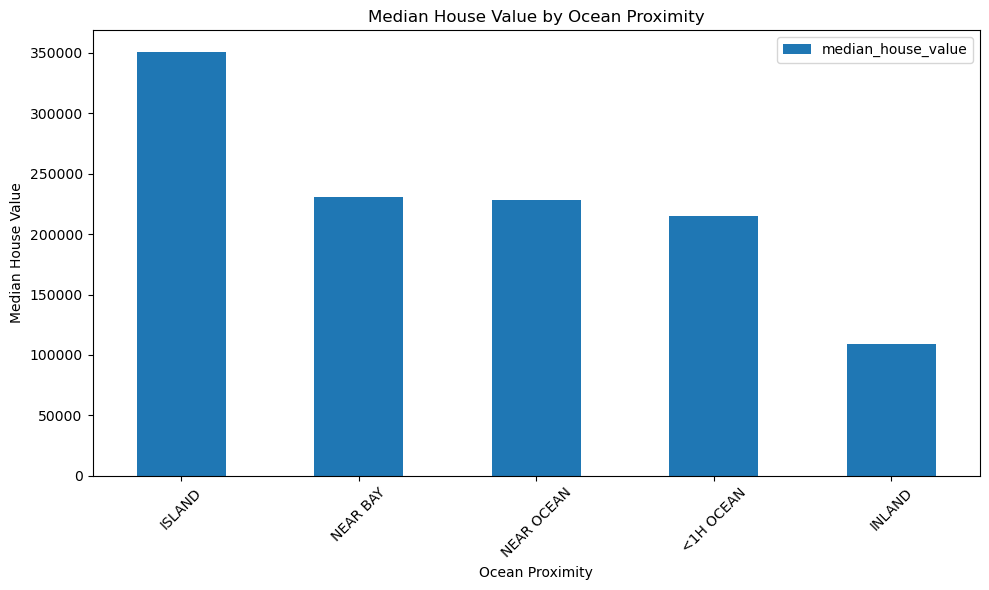

In [ ]:
from IPython.display import display

# Membuat pivot table median house value
ocean_pivot = california.pivot_table(
    index='ocean_proximity',
    values='median_house_value',
    aggfunc='median'
)

ocean_pivot_sorted = ocean_pivot.sort_values(
    by='median_house_value',
    ascending=False
)

# Menampilkan pivot table yang sudah diurutkan
display(ocean_pivot_sorted)

# Visualisasi pivot table
pivot_plot = ocean_pivot_sorted.plot.bar(figsize=(10, 6))
pivot_plot.set_xlabel('Ocean Proximity')
pivot_plot.set_ylabel('Median House Value')
pivot_plot.set_title('Median House Value by Ocean Proximity')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


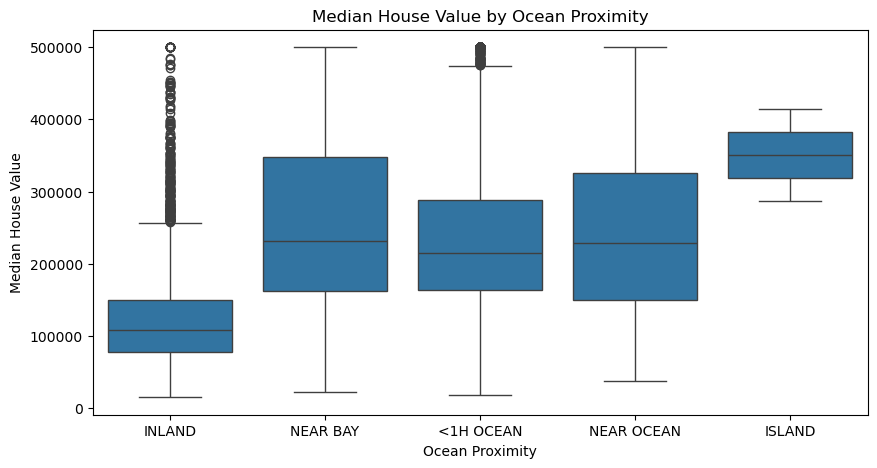

In [ ]:
# Visualisasi perbandingan harga rumah dengan kategori
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='ocean_proximity',
    y='median_house_value',
    data=california
)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


Berdasarkan boxplot, kategori INLAND memiliki jumlah outlier paling banyak, terutama pada nilai harga yang tinggi. Hal ini menunjukan bahwa meskipun harga rumah di wilayah Inland umumnya lebih rendah, terdapat beberapa distrik tertentu dengan harga yang jauh lebih tinggi dibandingkan pola umumnya. Sementara itu, wilayah yang lebih dekat dengan laut cenderung memiliki harga rumah yang lebih tinggi dan sebaran yang lebih konsisten, dengan jumlah outlier yang lebih sedikit.

### Analisis by Location

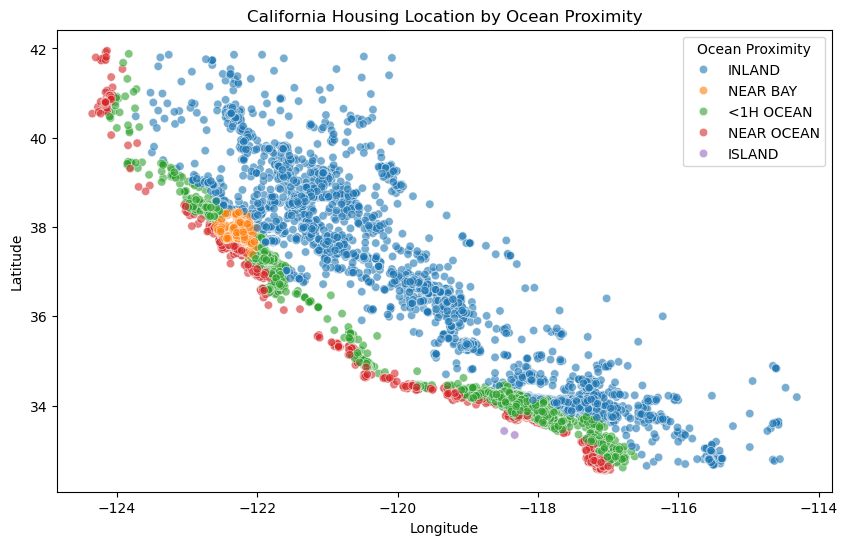

In [19]:
# Plot lokasi berdasarkan ocean_proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=california['longitude'],
    y=california['latitude'],
    hue=california['ocean_proximity'],
    alpha=0.6
).set_title('California Housing Location by Ocean Proximity')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Ocean Proximity')
plt.show()


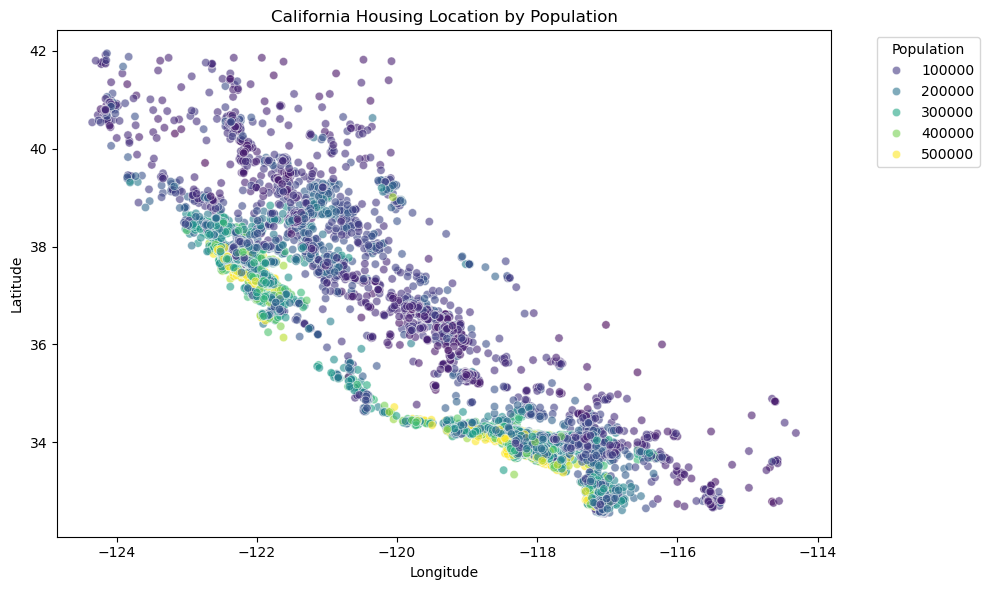

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=california['longitude'],
    y=california['latitude'],
    hue=california['median_house_value'],
    palette='viridis',
    alpha=0.6
)

plt.title('California Housing Location by Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Visualisasi berbasis lokasi memnunjukan bahwa kategori ocean_proximity terdistribusi sesuai dengan posisi geografis California, di mana wilayah yang dekat dengan laut terkonsentrasi di sepanjang pesisir, sementara untuk distrik INLAND tersebar di area pedalaman. Selain itu, wilayah dengan populasi lebih tinggi cenderung berlokasi di sekitar persisir dan pusat aktivitas, sedangkan populasi rendah lebih banyak ditemukan di wilayah pedalaman. Pola ini menegaskan bahwa faktor lokasi dan kepadatan penduduk berperan penting dalam membedakan karakteristik wilayah di California.

### Analisis hubungan fitur numerik terhadap median_value_house

In [ ]:

# Ambil fitur numerik
num_cols = california.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Korelasi terhadap target
corr_target = california[num_cols].corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)
corr_target


median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045915
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64

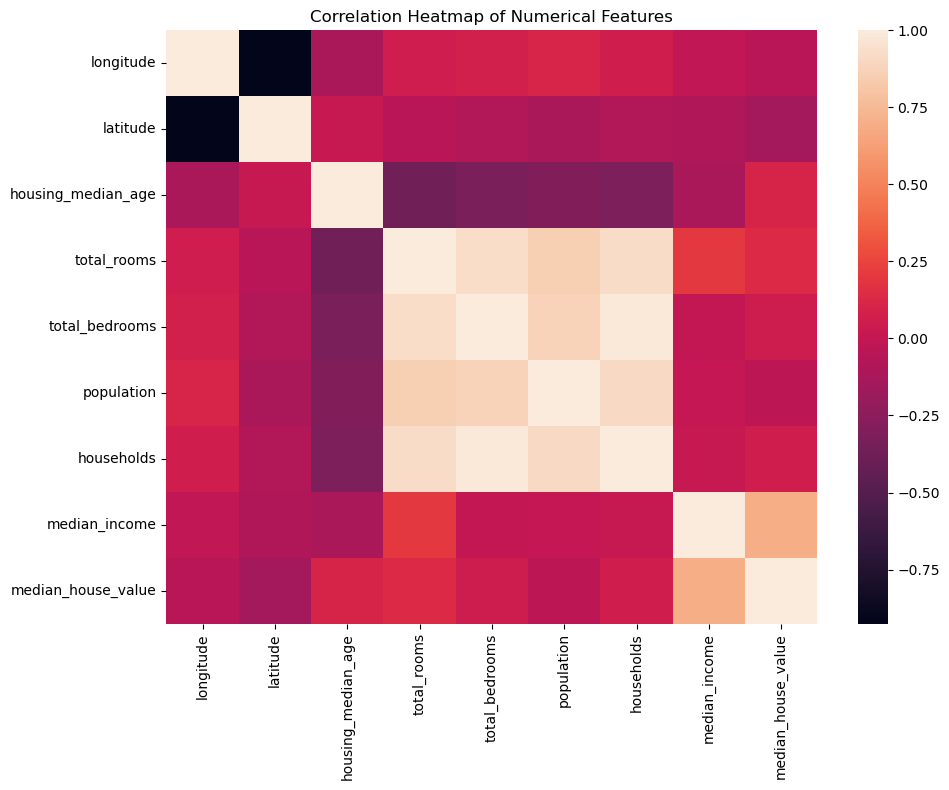

In [23]:
# Heatmap korelasi fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(california[num_cols].corr(numeric_only=True), annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


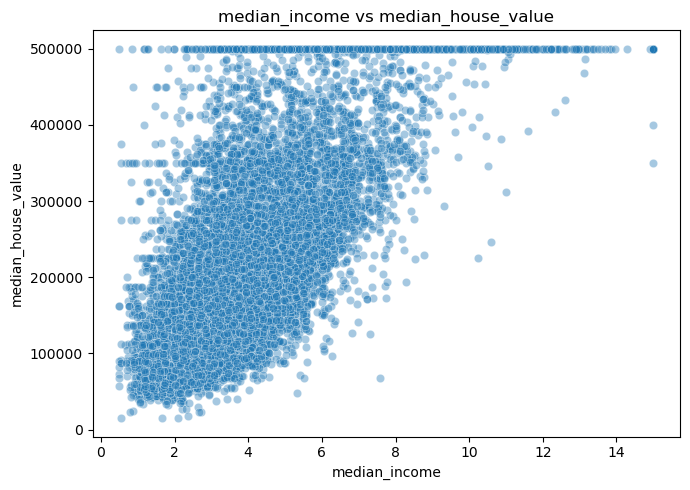

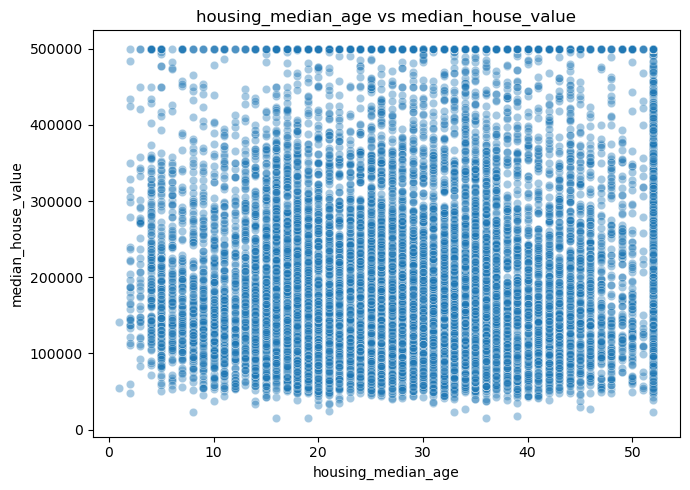

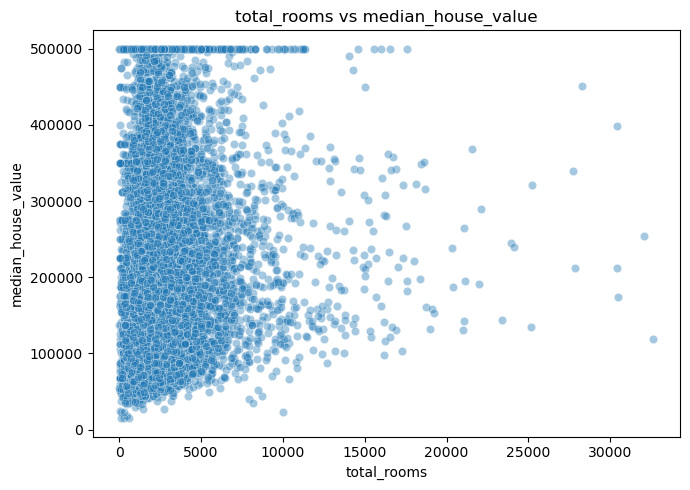

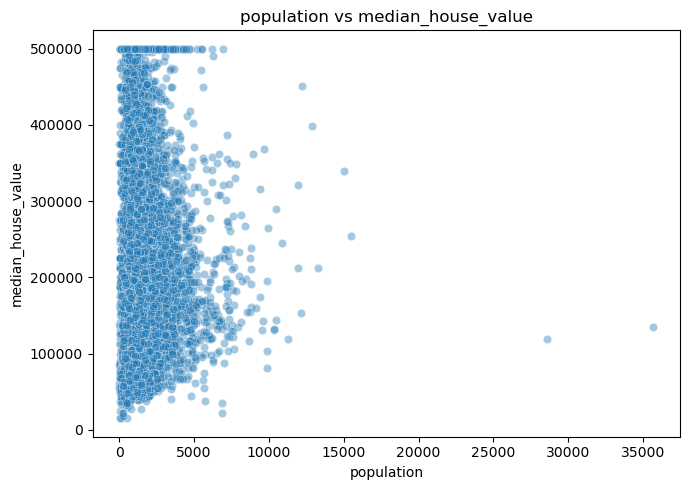

In [24]:
# Scatter plot beberapa fitur yang umum berhubungan dengan target
features_to_plot = ['median_income', 'housing_median_age', 'total_rooms', 'population']

for col in features_to_plot:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=california[col], y=california['median_house_value'], alpha=0.4)
    plt.title(f'{col} vs median_house_value')
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.tight_layout()
    plt.show()


Hasil analisis korelasi menunjukkan bahwa median_income memiliki hubungan paling kuat dan positif terhadap median_house_value, dengan nilai korelasi sekitar 0,69. Hal ini mengindikasikan bahwa distrik dengan tingkat pendapatan median yang lebih tinggi cenderung memiliki nilai rumah yang lebih mahal, yang juga terlihat jelas pada scatter plot dengan pola hubungan yang meningkat.

Fitur-fitur lain seperti total_rooms, housing_median_age, dan households menunjukkan korelasi positif yang lemah terhadap nilai rumah. Meskipun terdapat kecenderungan peningkatan harga rumah seiring bertambahnya nilai fitur-fitur tersebut, hubungan yang ditunjukkan relatif tidak kuat dan tersebar.

Sementara itu, population, longitude, dan latitude memiliki korelasi negatif yang sangat lemah terhadap median_house_value. Hal ini menandakan bahwa secara individual, ketiga fitur tersebut tidak memiliki pengaruh linear yang signifikan terhadap harga rumah, meskipun secara spasial dan dalam kombinasi dengan fitur lain tetap dapat berkontribusi pada variasi nilai rumah.

Secara keseluruhan, hasil ini menunjukkan bahwa faktor ekonomi, khususnya pendapatan median, merupakan prediktor utama harga rumah dalam dataset ini, sedangkan fitur numerik lainnya berperan sebagai faktor pendukung yang kemungkinan lebih efektif ketika digunakan bersama dalam model prediksi.

### Anlisis Kepadatan Penduduk Dengan Harga Rumah

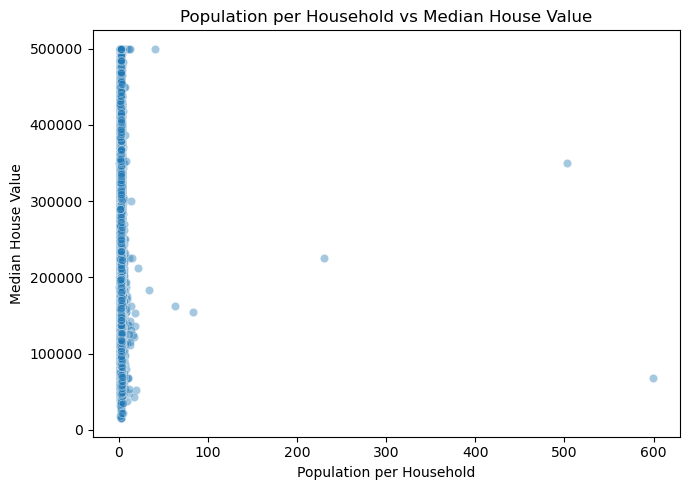

In [29]:

# Buat fitur kepadatan penduduk (population per household)
california['population_per_household'] = california['population'] / california['households']

# Scatter plot kepadatan vs harga
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=california['population_per_household'],
    y=california['median_house_value'],
    alpha=0.4
)
plt.title('Population per Household vs Median House Value')
plt.xlabel('Population per Household')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()


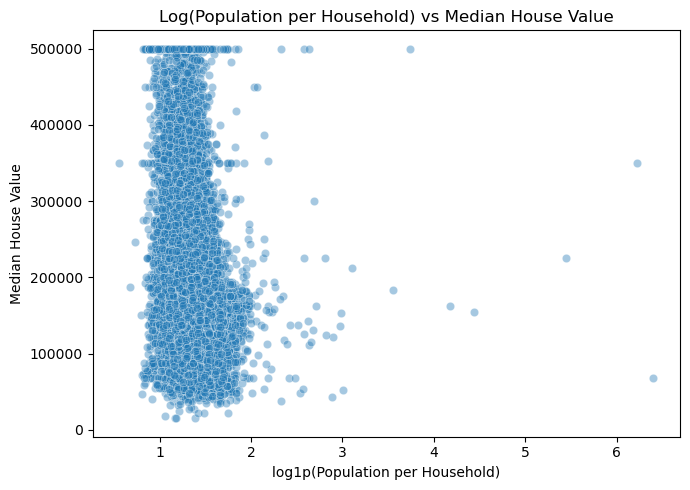

In [ ]:
# Versi log untuk mengurangi skew pada kepadatan 
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=np.log1p(california['population_per_household']),
    y=california['median_house_value'],
    alpha=0.4
)
plt.title('Log(Population per Household) vs Median House Value')
plt.xlabel('log1p(Population per Household)')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()


In [ ]:
# Buat fitur turunan 
california['rooms_per_household'] = california['total_rooms'] / california['households']
california['bedrooms_per_room'] = california['total_bedrooms'] / california['total_rooms']
california['bedrooms_per_household'] = california['total_bedrooms'] / california['households']

california[['rooms_per_household', 'bedrooms_per_room', 'bedrooms_per_household']].describe()


,rooms_per_household,bedrooms_per_room,bedrooms_per_household
count,14448.000000,14311.000000,14311.000000
mean,5.423404,0.212895,1.095258
std,2.287619,0.058188,0.454792
min,0.846154,0.100000,0.333333
25%,4.452249,0.175575,1.005854
50%,5.229318,0.202886,1.048960
75%,6.047619,0.239186,1.100319
max,132.533333,1.000000,34.066667


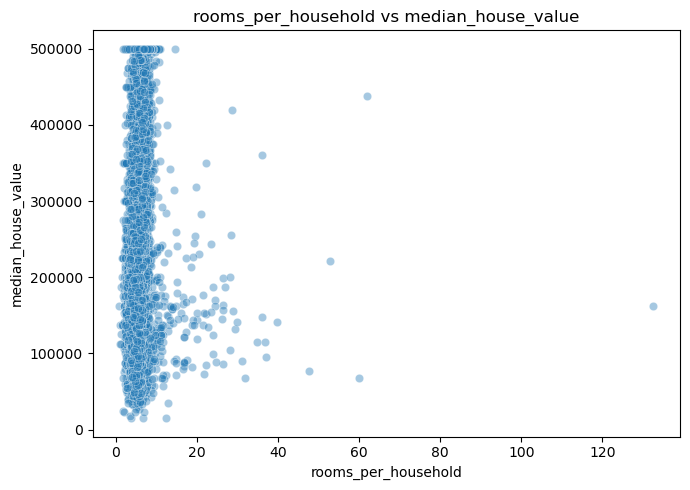

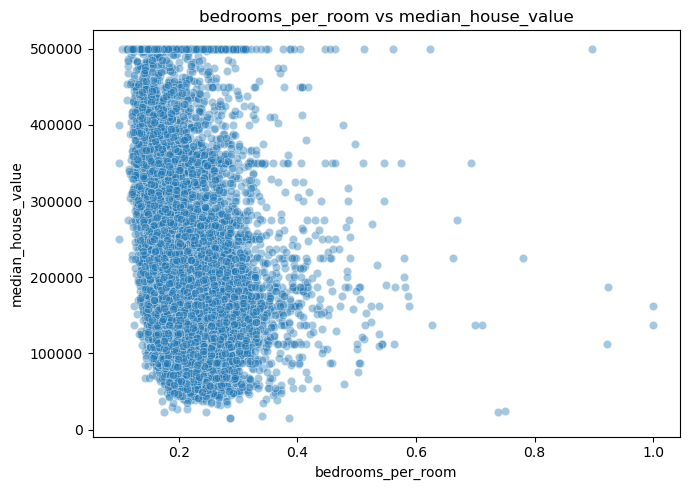

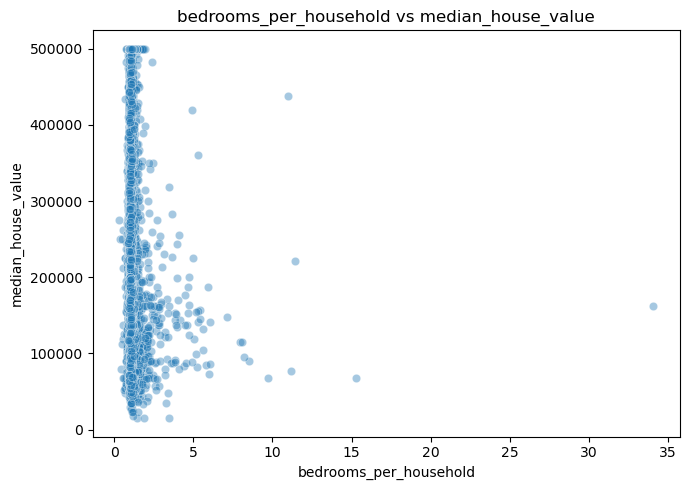

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot hubungan fitur turunan dengan target
derived_features = ['rooms_per_household', 'bedrooms_per_room', 'bedrooms_per_household']

for col in derived_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=california[col], y=california['median_house_value'], alpha=0.4)
    plt.title(f'{col} vs median_house_value')
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.tight_layout()
    plt.show()


Hubungan antara population per household dan median_house_value menunjukkan pola yang lemah dan tidak linear. Mayoritas distrik terkonsentrasi pada nilai population per household yang rendah, namun memiliki rentang harga rumah yang sangat bervariasi. Transformasi log membantu memperjelas sebaran data, tetapi tetap tidak menunjukkan tren yang kuat, sehingga kepadatan penduduk per rumah tangga bukan faktor utama penentu harga rumah.

Pada fitur turunan rooms_per_household, terlihat kecenderungan bahwa distrik dengan jumlah ruangan per rumah tangga yang lebih besar memiliki potensi harga rumah yang lebih tinggi, meskipun sebarannya cukup luas dan mengandung outlier ekstrem. Hal ini menunjukkan bahwa ukuran atau kapasitas hunian berkontribusi terhadap nilai rumah, namun bukan satu-satunya faktor.

Sementara itu, bedrooms_per_room menunjukkan kecenderungan hubungan negatif, di mana proporsi kamar tidur yang tinggi terhadap total ruangan sering dikaitkan dengan harga rumah yang lebih rendah. Pola ini dapat mengindikasikan efisiensi tata ruang yang lebih rendah pada distrik tersebut.

Fitur bedrooms_per_household juga memperlihatkan hubungan yang lemah dengan harga rumah, dengan sebagian besar data terkonsentrasi pada nilai rendah dan beberapa outlier ekstrem yang tidak merepresentasikan pola umum.
Secara keseluruhan, fitur-fitur turunan ini memberikan informasi tambahan mengenai karakteristik hunian, namun pengaruhnya terhadap harga rumah relatif lebih lemah dibandingkan faktor ekonomi seperti median_income. Fitur-fitur tersebut tetap relevan sebagai pendukung dalam pemodelan, terutama ketika dikombinasikan dengan variabel lain.

## Data Preprocessing

Pada tahap ini, dilakukan proses data pre-processing untuk memastikan dataset berada dalam kondisi yang siap digunakan pada tahap analisis dan pemodelan selanjutnya. Proses ini bertujuan untuk meningkatkan kualitas data serta meminimalkan potensi bias yang dapat memengaruhi hasil analisis. Beberapa langkah yang akan dilakukan pada tahap ini meliputi penghapusan fitur yang tidak relevan dengan permasalahan yang dikaji, serta penanganan nilai yang hilang. Penanganan missing value dapat dilakukan dengan menghapus fitur atau observasi tertentu apabila tidak dibutuhkan, atau dengan melakukan imputasi menggunakan nilai yang paling sesuai berdasarkan karakteristik dan konteks data.

Dataframe yang sudah diduplikat akan digunakan untuk proses lanjutan kedepannya.

In [31]:
# Membuat duplikasi dataframe
california_model = california.copy()

In [33]:

# Cek informasi detail untuk setiap fitur
listItem = []

for col in california_model.columns:
    listItem.append([
        col,
        california_model[col].dtype,
        california_model[col].isna().sum(),
        round((california_model[col].isna().sum() / len(california_model[col])) * 100, 2),
        california_model[col].nunique(),
        california_model[col]
            .drop_duplicates()
            .sample(min(2, california_model[col].nunique()))
            .values
            .tolist()
    ])

df_model_desc = pd.DataFrame(
    listItem,
    columns=[
        'dataFeatures',
        'dataType',
        'null',
        'nullPct',
        'unique',
        'uniqueSample'
    ]
)

df_model_desc


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-115.59, -117.5]"
1,latitude,float64,0,0.00,836,"[33.34, 37.66]"
2,housing_median_age,float64,0,0.00,52,"[8.0, 50.0]"
3,total_rooms,float64,0,0.00,5227,"[1676.0, 3817.0]"
4,total_bedrooms,float64,137,0.95,1748,"[2278.0, 202.0]"
5,population,float64,0,0.00,3498,"[1339.0, 2156.0]"
6,households,float64,0,0.00,1649,"[2387.0, 459.0]"
7,median_income,float64,0,0.00,9797,"[5.1506, 4.988]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, INLAND]"
9,median_house_value,float64,0,0.00,3548,"[137200.0, 57600.0]"


Sebagian besar fitur dalam dataset california_model memiliki kualitas data yang sangat baik, ditandai dengan tidak adanya nilai hilang pada hampir seluruh variabel. Satu-satunya fitur yang memiliki missing value adalah total_bedrooms serta fitur turunan yang bergantung padanya, yaitu bedrooms_per_room dan bedrooms_per_household, masing-masing dengan proporsi missing value sekitar 0,95 persen. Proporsi ini tergolong sangat kecil sehingga penanganan missing value dapat dilakukan melalui imputasi tanpa perlu menghapus baris data.

Fitur-fitur numerik seperti longitude, latitude, housing_median_age, total_rooms, population, households, dan median_income memiliki jumlah nilai unik yang cukup besar, yang menunjukkan variasi data yang baik dan potensi kontribusi terhadap model prediksi. Variabel median_house_value sebagai target juga menunjukkan variasi nilai yang luas, sehingga layak digunakan untuk pemodelan regresi.

Variabel ocean_proximity merupakan satu-satunya fitur kategorikal dengan lima kategori unik. Fitur ini relevan secara konseptual dan terbukti penting berdasarkan analisis EDA sebelumnya, sehingga perlu dipertahankan dan dilakukan encoding pada tahap selanjutnya.
Fitur turunan seperti population_per_household, rooms_per_household, bedrooms_per_room, dan bedrooms_per_household memiliki jumlah nilai unik yang sangat tinggi, yang menunjukkan bahwa fitur-fitur tersebut mampu menangkap karakteristik distrik secara lebih granular. Meskipun demikian, keberadaan outlier ekstrem pada beberapa fitur turunan perlu diperhatikan dan dapat ditangani melalui transformasi atau scaling pada tahap berikutnya.

Secara keseluruhan, dataset ini berada dalam kondisi yang siap untuk diproses lebih lanjut, dengan fokus utama preprocessing pada imputasi missing value, encoding fitur kategorikal, serta scaling dan transformasi fitur numerik sebelum masuk ke tahap pemodelan.

### Missing values handling

In [34]:
# Cek jumlah missing value per kolom
california_model.isna().sum().sort_values(ascending=False)


total_bedrooms              137
bedrooms_per_room           137
bedrooms_per_household      137
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
population                    0
households                    0
median_income                 0
ocean_proximity               0
median_house_value            0
population_per_household      0
rooms_per_household           0
dtype: int64

In [35]:
# Imputasi total_bedrooms dengan median (lebih robust terhadap outlier)
median_bedrooms = california_model['total_bedrooms'].median()
california_model['total_bedrooms'] = california_model['total_bedrooms'].fillna(median_bedrooms)


In [36]:
# Jika fitur turunan bergantung pada total_bedrooms, hitung ulang agar tidak ikut missing
california_model['bedrooms_per_room'] = california_model['total_bedrooms'] / california_model['total_rooms']
california_model['bedrooms_per_household'] = california_model['total_bedrooms'] / california_model['households']

# Validasi missing value sudah hilang
california_model[['total_bedrooms', 'bedrooms_per_room', 'bedrooms_per_household']].isna().sum()


total_bedrooms            0
bedrooms_per_room         0
bedrooms_per_household    0
dtype: int64

Sebelum dilakukan proses penanganan missing value, terdapat 137 nilai kosong pada fitur total_bedrooms serta dua fitur turunan yang bergantung padanya, yaitu bedrooms_per_room dan bedrooms_per_household. Fitur-fitur lainnya tidak memiliki nilai hilang, sehingga permasalahan missing value hanya terfokus pada variabel yang berkaitan dengan jumlah kamar tidur.

Setelah dilakukan proses imputasi pada total_bedrooms menggunakan nilai median dan perhitungan ulang fitur turunan, seluruh nilai hilang pada ketiga fitur tersebut berhasil diatasi. Hal ini ditunjukkan dengan jumlah missing value yang menjadi nol pada tahap akhir. Dengan demikian, dataset berada dalam kondisi lengkap dan siap digunakan untuk proses analisis lanjutan serta pemodelan tanpa perlu menghapus baris data.

### Memisahkan fitur numerik dan kategorikal

In [39]:
# Identifikasi kolom numerik dan kategorikal
num_features = california_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = california_model.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

num_features, cat_features


(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value',
  'population_per_household',
  'rooms_per_household',
  'bedrooms_per_room',
  'bedrooms_per_household'],
 ['ocean_proximity'])

Berdasarkan hasil identifikasi tipe data, fitur pada dataset california_model terbagi menjadi dua kelompok utama, yaitu fitur numerik dan fitur kategorikal. Fitur numerik terdiri dari variabel yang merepresentasikan nilai kuantitatif seperti lokasi geografis, karakteristik perumahan, kondisi demografis, serta fitur turunan yang telah dibentuk, termasuk median_house_value sebagai variabel target. Sementara itu, ocean_proximity merupakan satu-satunya fitur kategorikal yang merepresentasikan kedekatan lokasi distrik terhadap laut.

Pemisahan ini dilakukan untuk memastikan bahwa setiap jenis fitur mendapatkan perlakuan preprocessing yang sesuai. Fitur numerik akan diproses menggunakan teknik seperti imputasi, transformasi, dan scaling, sedangkan fitur kategorikal akan ditangani melalui proses encoding agar dapat digunakan oleh model machine learning. Dengan pemisahan ini, proses preprocessing menjadi lebih terstruktur dan membantu meningkatkan efektivitas pemodelan pada tahap selanjutnya.

In [81]:
# Pastikan tidak membagi dengan nol
california_model = california_model.copy()

california_model['population_per_household'] = california_model['population'] / california_model['households']
california_model['rooms_per_household'] = california_model['total_rooms'] / california_model['households']
california_model['bedrooms_per_room'] = california_model['total_bedrooms'] / california_model['total_rooms']
california_model['bedrooms_per_household'] = california_model['total_bedrooms'] / california_model['households']

california_model[['population_per_household', 'rooms_per_household', 'bedrooms_per_room', 'bedrooms_per_household']].head()


,population_per_household,rooms_per_household,bedrooms_per_room,bedrooms_per_household
0,4.825000,2.800000,0.250000,0.700000
1,3.018051,3.671480,0.322517,1.184116
2,3.810440,6.478022,0.167939,1.087912
3,3.051000,2.518000,0.474980,1.196000
4,3.628743,4.622754,0.251295,1.161677


### Outliers handling

In [40]:
def cap_outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)
    return lower, upper

cols_to_cap = ['median_house_value', 'rooms_per_household', 'population_per_household']

bounds = {}
for c in cols_to_cap:
    lower, upper = cap_outliers_iqr(california_model, c)
    bounds[c] = (lower, upper)

bounds


{'median_house_value': (np.float64(-96850.0), np.float64(480350.0)),
 'rooms_per_household': (np.float64(2.0591934938436554),
  np.float64(8.440674379884282)),
 'population_per_household': (np.float64(1.1475032860584282),
  np.float64(4.560210696794743))}

Pada tahap ini, dilakukan penanganan outlier pada beberapa fitur yang memiliki nilai ekstrem, yaitu median_house_value, rooms_per_household, dan population_per_household. Penanganan dilakukan menggunakan metode Interquartile Range (IQR) dengan tujuan untuk membatasi nilai yang terlalu jauh dari sebaran utama data tanpa menghapus baris observasi.

Metode IQR menentukan batas bawah dan batas atas berdasarkan kuartil pertama dan ketiga data. Nilai yang berada di luar rentang tersebut kemudian dilakukan capping, yaitu disesuaikan ke nilai batas terdekat. Dengan pendekatan ini, pengaruh nilai ekstrem dapat dikurangi sehingga distribusi data menjadi lebih stabil dan tidak terlalu didominasi oleh outlier.

Hasil proses ini disimpan dalam variabel bounds, yang mencatat batas bawah dan atas untuk setiap fitur yang diproses. Informasi ini berguna sebagai referensi untuk memahami rentang nilai wajar pada masing-masing fitur setelah penanganan outlier. Secara keseluruhan, langkah ini membantu meningkatkan kualitas data dan diharapkan dapat meningkatkan performa serta stabilitas model pada tahap pemodelan selanjutnya.

### Transformasi distribusi data (log transform)

In [41]:

# Log transform untuk fitur yang cenderung skewed
california_model['log_median_income'] = np.log1p(california_model['median_income'])
california_model['log_population_per_household'] = np.log1p(california_model['population_per_household'])
california_model['log_rooms_per_household'] = np.log1p(california_model['rooms_per_household'])

california_model[['log_median_income', 'log_population_per_household', 'log_rooms_per_household']].head()


,log_median_income,log_population_per_household,log_rooms_per_household
0,1.090244,1.715636,1.335001
1,1.181850,1.390797,1.541476
2,1.987737,1.570788,2.011968
3,1.000595,1.398964,1.257893
4,1.169568,1.532285,1.726822


Transformasi logaritmik diterapkan pada fitur median_income, population_per_household, dan rooms_per_household untuk mengurangi tingkat skewness pada distribusi data. Hasil transformasi menghasilkan nilai baru dalam skala log, seperti terlihat pada kolom log_median_income, log_population_per_household, dan log_rooms_per_household, di mana rentang nilai menjadi lebih kecil dan lebih terkontrol dibandingkan nilai aslinya.

Dengan menggunakan fungsi log1p, transformasi dapat dilakukan dengan aman meskipun terdapat nilai nol atau sangat kecil. Nilai hasil transformasi ini menunjukkan bahwa perbedaan ekstrem pada data asli telah dikompresi, sehingga distribusi data menjadi lebih mendekati normal. Kondisi ini membantu model machine learning dalam mempelajari pola hubungan antar fitur dengan lebih stabil dan mengurangi dominasi nilai ekstrem terhadap proses pelatihan.

Secara keseluruhan, transformasi log ini bertujuan untuk meningkatkan kualitas fitur numerik yang memiliki distribusi tidak seimbang, sehingga diharapkan dapat memberikan kontribusi yang lebih efektif terhadap performa model pada tahap pemodelan selanjutnya.

### Validasi konsistensi nilai

Validasi dilakukan untuk mendeteksi nilai negatif atau nol yang seharusnya tidak terjadi pada fitur tertentu.

In [42]:
cols_should_be_positive = [
    'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
    'population_per_household', 'rooms_per_household', 'bedrooms_per_room', 'bedrooms_per_household'
]

cols_exist = [c for c in cols_should_be_positive if c in california_model.columns]

invalid_counts = {}
for c in cols_exist:
    invalid_counts[c] = int((california_model[c] <= 0).sum())

invalid_counts


{'total_rooms': 0,
 'total_bedrooms': 0,
 'population': 0,
 'households': 0,
 'median_income': 0,
 'population_per_household': 0,
 'rooms_per_household': 0,
 'bedrooms_per_room': 0,
 'bedrooms_per_household': 0}

### Feature selection based on domain dan EDA

In [43]:
target_col = 'median_house_value'

feature_cols = [c for c in california_model.columns if c != target_col]
print(f'Jumlah fitur input: {len(feature_cols)}')
feature_cols


Jumlah fitur input: 16


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'population_per_household',
 'rooms_per_household',
 'bedrooms_per_room',
 'bedrooms_per_household',
 'log_median_income',
 'log_population_per_household',
 'log_rooms_per_household']

Berdasarkan identifikasi, terdapat fitur yang redundant, antara lain:
- median_income dan log_median_income
- population_per_household dan log_population_per_household
- rooms_per_household dan log_population_per_household

Secara informasi, masing-masing pasangan membawa informasi yang sama, hanya berbeda skala. Jika keduanya digunakan sekaligus dikhawatirkan akan menimbulkan multikolinearitas tinggi, membingungan model dan tidak memberikan informasi baru. Dikarenakan transformasi log sudah dilakukan guna mengurangi skewness dan model akan menggunakan hasil transformasi, maka versi log akan dipertahankan dan yang asli akan didrop.

In [44]:
# Drop fitur yang redundant (versi asli, mempertahankan versi log)
cols_to_drop = [
    'median_income',
    'population_per_household',
    'rooms_per_household'
]

california_model = california_model.drop(columns=cols_to_drop)

# Cek kolom setelah drop
california_model.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'ocean_proximity',
       'median_house_value', 'bedrooms_per_room', 'bedrooms_per_household',
       'log_median_income', 'log_population_per_household',
       'log_rooms_per_household'],
      dtype='object')

### Cek multikolinearitas secara ringkas untuk EDA

In [ ]:

num_cols = california_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = california_model[num_cols].corr(numeric_only=True).abs()

# Ambil pasangan korelasi tinggi (di atas 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_tri.stack().sort_values(ascending=False)
high_corr_pairs[high_corr_pairs > 0.8].head(15)


total_bedrooms     households                 0.975467
total_rooms        total_bedrooms             0.929750
longitude          latitude                   0.925158
total_rooms        households                 0.919292
population         households                 0.905061
total_bedrooms     population                 0.871812
total_rooms        population                 0.853460
bedrooms_per_room  log_rooms_per_household    0.822905
dtype: float64

Hasil analisis korelasi menunjukkan adanya beberapa pasangan fitur dengan korelasi yang tinggi, terutama antara fitur-fitur yang merepresentasikan ukuran hunian dan kepadatan wilayah seperti total_rooms, total_bedrooms, households, dan population. Korelasi tinggi ini mengindikasikan potensi multikolinearitas yang wajar secara konseptual karena fitur-fitur tersebut saling berkaitan. Temuan ini dicatat sebagai pertimbangan awal, sementara keputusan penghapusan fitur akan ditentukan pada tahap pemodelan berdasarkan performa model yang dihasilkan.

# Modeling

In [ ]:


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [52]:
transformer = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity'])
    ],
    remainder='passthrough'
)


**Data Splitting**

In [53]:
X = california_model.drop(['median_house_value'], axis=1)
y = california_model['median_house_value']

X.shape, y.shape


((14448, 13), (14448,))

**Train-Test Split**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((10113, 13), (4335, 13), (10113,), (4335,))

**Choose a Benchmark Model**

In [56]:
import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline(steps=[
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


[-65066.27179316 -66212.50609117 -63558.69227119 -62462.02711056
 -63000.99214468] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-44947.94177277 -46429.55233564 -43485.993069   -42661.832964
 -44325.01541248] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24751965 -0.24183187 -0.23193409 -0.23316751 -0.24598296] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-59049.55067986 -60461.67490965 -59348.48699973 -57172.572229
 -58341.18240621] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-39531.47672914 -40566.55959994 -40025.04515793 -38696.09203381
 -39855.88648329] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
    

In [57]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan

model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

cv_summary = pd.DataFrame({
    'Model': model_names,

    'RMSE_mean': nilai_mean_rmse,
    'RMSE_std': nilai_std_rmse,

    'MAE_mean': nilai_mean_mae,
    'MAE_std': nilai_std_mae,

    'MAPE_mean': nilai_mean_mape,
    'MAPE_std': nilai_std_mape
})

cv_summary

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,Linear Regression,-64060.097882,1383.632161,-44370.067111,1286.631181,-0.240087,0.006441
1,KNN,-58874.693445,1091.367602,-39735.012001,618.220444,-0.211334,0.004398
2,Decision Tree,-70127.867698,1298.488505,-46577.082751,877.619629,-0.256036,0.005591
3,Random Forest,-50836.227775,2026.084778,-33164.227316,1140.318992,-0.176299,0.005649
4,XGBoost,-48165.041884,1852.979025,-31476.412006,891.912498,-0.167556,0.004814


Hasil benchmark menunjukkan bahwa model berbasis non-linear memberikan performa yang lebih baik dibandingkan model linear. Linear Regression dan KNN menghasilkan nilai error yang lebih tinggi, sedangkan Decision Tree menunjukkan performa yang kurang stabil. Model ensemble seperti Random Forest dan XGBoost mampu menghasilkan nilai RMSE, MAE, dan MAPE yang lebih rendah, menandakan kemampuan yang lebih baik dalam menangkap pola kompleks pada data harga rumah.

Berdasarkan hasil tersebut, XGBoost direkomendasikan sebagai model utama karena memiliki performa terbaik secara keseluruhan. Sebagai alternatif, Random Forest dapat digunakan apabila diperlukan model yang lebih stabil dan mudah diimplementasikan. Model lainnya digunakan sebagai baseline pembanding dan tidak direkomendasikan sebagai model final.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [ ]:

# Benchmark 2 model terbaik
models = {
    'XGBoost': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline(steps=[
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Ringkasan hasil sebelum tuning
score_before_tuning = pd.DataFrame(
    {
        'RMSE': score_rmse,
        'MAE': score_mae,
        'MAPE': score_mape
    },
    index=models.keys()
)

score_before_tuning


,RMSE,MAE,MAPE
XGBoost,48503.827508,32181.344644,0.176787
RandomForest,51277.917869,33861.560674,0.183539


Berdasarkan evaluasi pada data uji, XGBoost menunjukkan performa yang lebih baik dibandingkan Random Forest pada seluruh metrik evaluasi. XGBoost menghasilkan nilai RMSE dan MAE yang lebih rendah, yang berarti rata-rata kesalahan prediksi baik secara kuadrat maupun absolut lebih kecil. Selain itu, nilai MAPE XGBoost juga lebih rendah, menunjukkan tingkat kesalahan prediksi relatif yang lebih kecil secara persentase.

Perbedaan performa ini mengindikasikan bahwa XGBoost lebih mampu menangkap pola kompleks dalam data harga rumah dibandingkan Random Forest pada konfigurasi awal tanpa tuning.

**Hyperparameter Tunning**

In [59]:

# Pipeline XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', XGBRegressor(
        random_state=1,
        objective='reg:squarederror'
    ))
])

# Parameter yang akan dituning
param_dist = {
    'model__n_estimators': [300, 500, 800, 1200],
    'model__max_depth': [2, 3, 4, 5, 6, 8],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'model__min_child_weight': [1, 2, 3, 5, 7, 10],
    'model__gamma': [0, 0.01, 0.05, 0.1, 0.2],
    'model__reg_alpha': [0, 0.01, 0.1, 1.0],
    'model__reg_lambda': [1.0, 1.5, 2.0, 3.0]
}

# Cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Randomized Search
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=1
)

# Fit tuning
xgb_random.fit(X_train, y_train)

# Best params & best score (CV)
print("Best Parameters:", xgb_random.best_params_)
print("Best CV RMSE:", -xgb_random.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Best Parameters: {'model__subsample': 0.7, 'model__reg_lambda': 3.0, 'model__reg_alpha': 0, 'model__n_estimators': 1200, 'model__min_child_weight': 2, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 0.1, 'model__colsample_bytree': 0.9}
Best CV RMSE: 45340.8126850866


**Evaluasi Model Terbaik**

In [ ]:
best_xgb = xgb_random.best_estimator_
y_pred = best_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

score_after_tuning = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape]
}, index=['XGBoost (Tuned)'])

score_after_tuning


,RMSE,MAE,MAPE
XGBoost (Tuned),45733.950461,29671.99734,0.160979


Exception ignored in: <function ResourceTracker.__del__ at 0x103b55e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1030a1e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103711e40>
Traceback (most recent call last

In [61]:

# Skor sebelum tuning (dari benchmark test set)
before = {
    'RMSE': 48503.827508,
    'MAE': 32181.344644,
    'MAPE': 0.176787
}

# Skor setelah tuning (dari hasil tuned model)
after = {
    'RMSE': 45733.950461,
    'MAE': 29671.997340,
    'MAPE': 0.160979
}

# Buat tabel perbandingan
comparison = pd.DataFrame(
    [before, after],
    index=['XGBoost (Before Tuning)', 'XGBoost (After Tuning)']
)

# Hitung improvement (penurunan error)
comparison.loc['Absolute Improvement'] = comparison.loc['XGBoost (Before Tuning)'] - comparison.loc['XGBoost (After Tuning)']
comparison.loc['Percent Improvement'] = (comparison.loc['Absolute Improvement'] / comparison.loc['XGBoost (Before Tuning)']) * 100

comparison


,RMSE,MAE,MAPE
XGBoost (Before Tuning),48503.827508,32181.344644,0.176787
XGBoost (After Tuning),45733.950461,29671.997340,0.160979
Absolute Improvement,2769.877047,2509.347304,0.015808
Percent Improvement,5.710636,7.797522,8.941834


Hasil perbandingan menunjukkan bahwa proses hyperparameter tuning memberikan peningkatan performa yang konsisten pada model XGBoost. Nilai RMSE berkurang sebesar sekitar 2.770, atau mengalami peningkatan performa sekitar 5,71%, yang menandakan penurunan kesalahan prediksi yang signifikan pada error berskala besar. Nilai MAE juga menurun sebesar sekitar 2.509, dengan persentase peningkatan sekitar 7,80%, menunjukkan bahwa rata-rata kesalahan prediksi berhasil dikurangi secara substansial.

Selain itu, nilai MAPE mengalami penurunan sebesar 0,0158, atau sekitar 8,94%, yang mengindikasikan peningkatan akurasi prediksi secara relatif terhadap nilai aktual. Penurunan error pada seluruh metrik menunjukkan bahwa hyperparameter tuning berhasil mengoptimalkan kemampuan model dalam menangkap pola kompleks pada data harga rumah.

Secara keseluruhan, hasil ini mengonfirmasi bahwa XGBoost yang telah dituning memberikan performa yang lebih baik dan stabil dibandingkan konfigurasi awal, sehingga layak digunakan sebagai model final dalam memprediksi harga rumah di California.

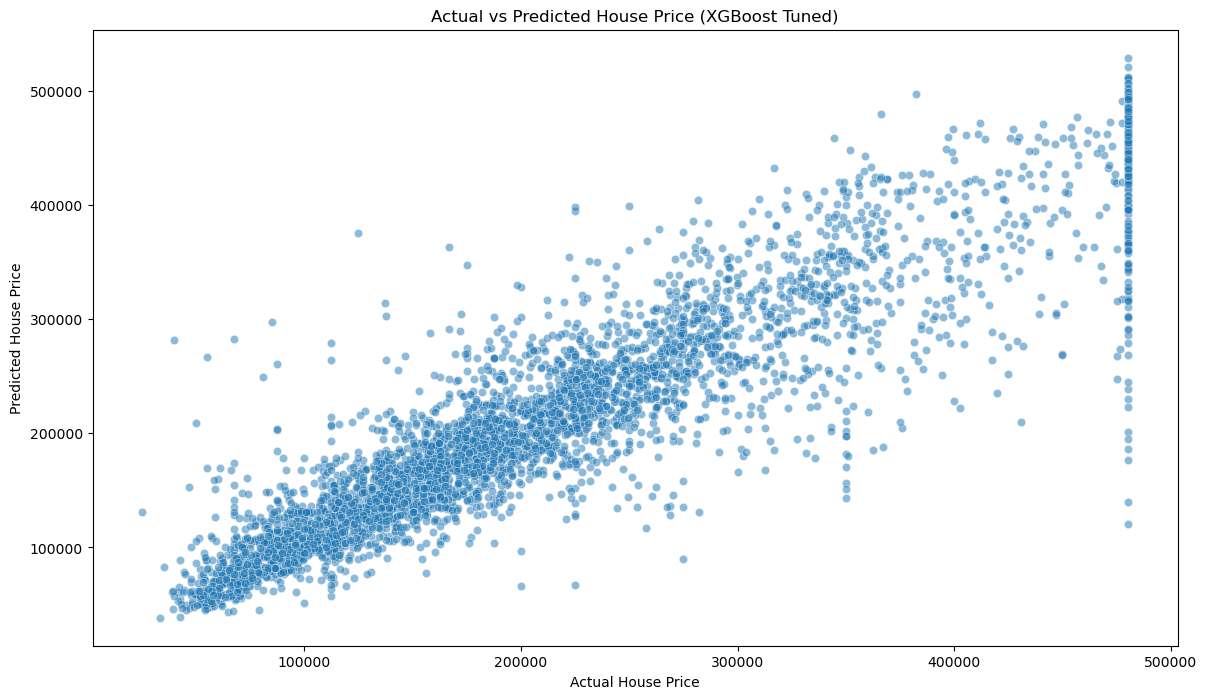

In [62]:
# Prediksi menggunakan model XGBoost yang sudah dituning
y_pred_xgb_tuning = best_xgb.predict(X_test)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=y_test,
    y=y_pred_xgb_tuning,
    alpha=0.5
).set(
    title='Actual vs Predicted House Price (XGBoost Tuned)',
    xlabel='Actual House Price',
    ylabel='Predicted House Price'
)

plt.show()

Plot Actual vs Predicted menunjukkan bahwa prediksi model XGBoost yang sudah dituning mengikuti pola diagonal, yang berarti model cukup baik menangkap hubungan umum antara fitur dan median_house_value. Titik-titik paling rapat berada pada kisaran harga menengah, menandakan akurasi model relatif lebih baik pada rentang ini.

Namun, semakin tinggi nilai harga aktual, sebaran titik semakin melebar. Ini mengindikasikan error prediksi cenderung lebih besar pada rumah berharga tinggi. Selain itu, terlihat penumpukan titik pada nilai aktual mendekati 500.000 (garis vertikal di sisi kanan), yang menunjukkan adanya batas maksimum (capped value) pada target sehingga model lebih sulit membedakan variasi harga pada segmen paling mahal. Secara keseluruhan, model sudah perform dengan baik, tetapi masih memiliki keterbatasan dalam memprediksi properti pada rentang harga tinggi.

**Prediksi dan Evaluasi metrik final di test set**

In [ ]:
# Prediksi
y_pred = best_xgb.predict(X_test)

# Metrik
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

final_score = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape]
}, index=['XGBoost (Final Tuned)'])

final_score


,RMSE,MAE,MAPE
XGBoost (Final Tuned),45733.950461,29671.99734,0.160979


Hasil evaluasi pada data uji menunjukkan bahwa model XGBoost yang telah dituning mampu memberikan performa prediksi yang baik dan stabil. Nilai RMSE sebesar 45.734 menunjukkan bahwa rata-rata kesalahan prediksi berada pada kisaran puluhan ribu, yang masih wajar mengingat rentang harga rumah pada dataset mencapai ratusan ribu. Nilai MAE sebesar 29.672 mengindikasikan bahwa secara rata-rata, prediksi model meleset sekitar 30 ribu dari nilai aktual.

Selain itu, nilai MAPE sebesar 16,1% menunjukkan bahwa kesalahan prediksi relatif terhadap harga aktual masih berada dalam batas yang dapat diterima untuk konteks pasar properti. Karena evaluasi ini dilakukan pada data test yang tidak pernah dilihat model sebelumnya, hasil ini mencerminkan kemampuan generalisasi model yang baik. Dengan demikian, XGBoost hasil tuning dapat dianggap sebagai model final yang andal untuk memprediksi harga rumah di California.

**Residual Analysis**

In [ ]:
#Menghitung residual untuk mengecek bias pola error dan apakah error menyebar secara wajar
residuals = y_test - y_pred


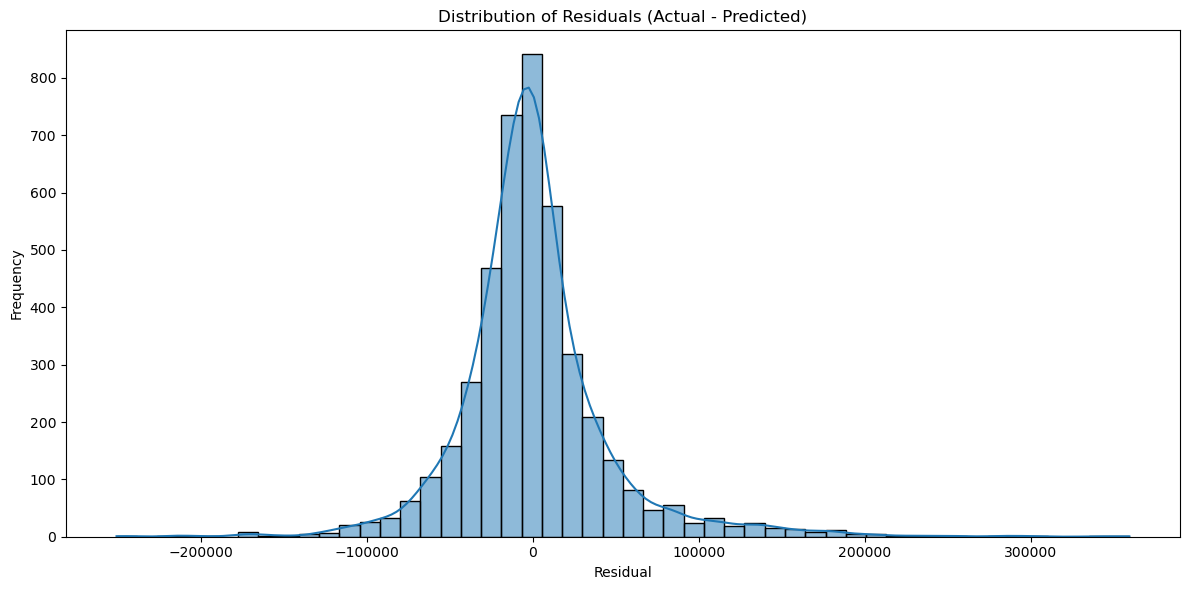

In [ ]:
#Plot distribusi residual
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


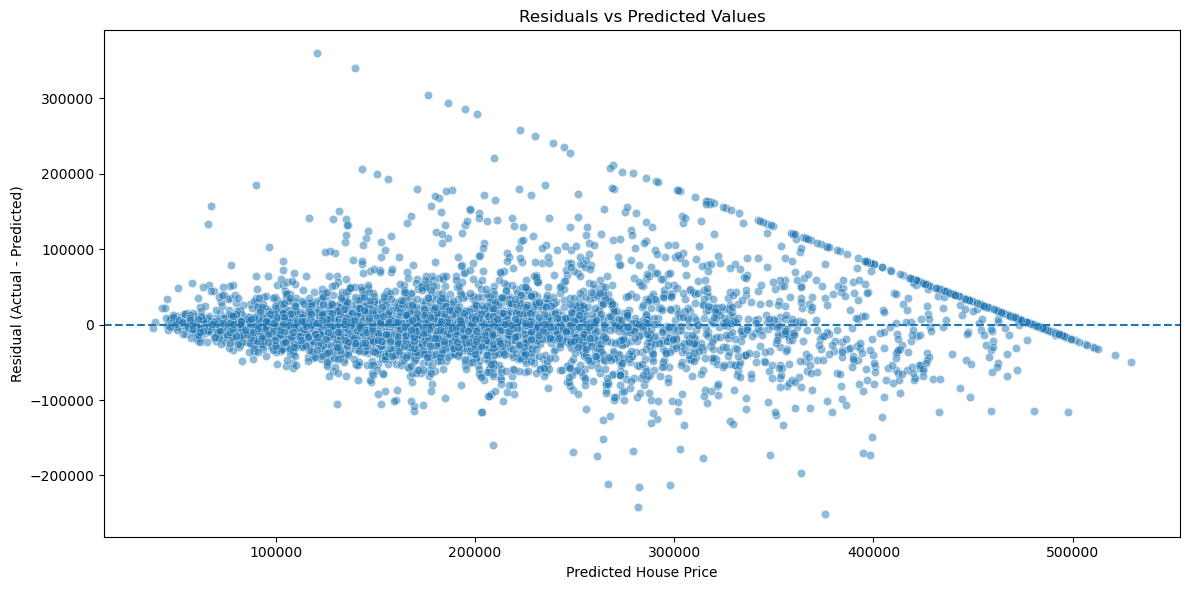

In [ ]:
#Residual vs Predictied (untuk melihat pola seperti Heteroskedastis)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted House Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()


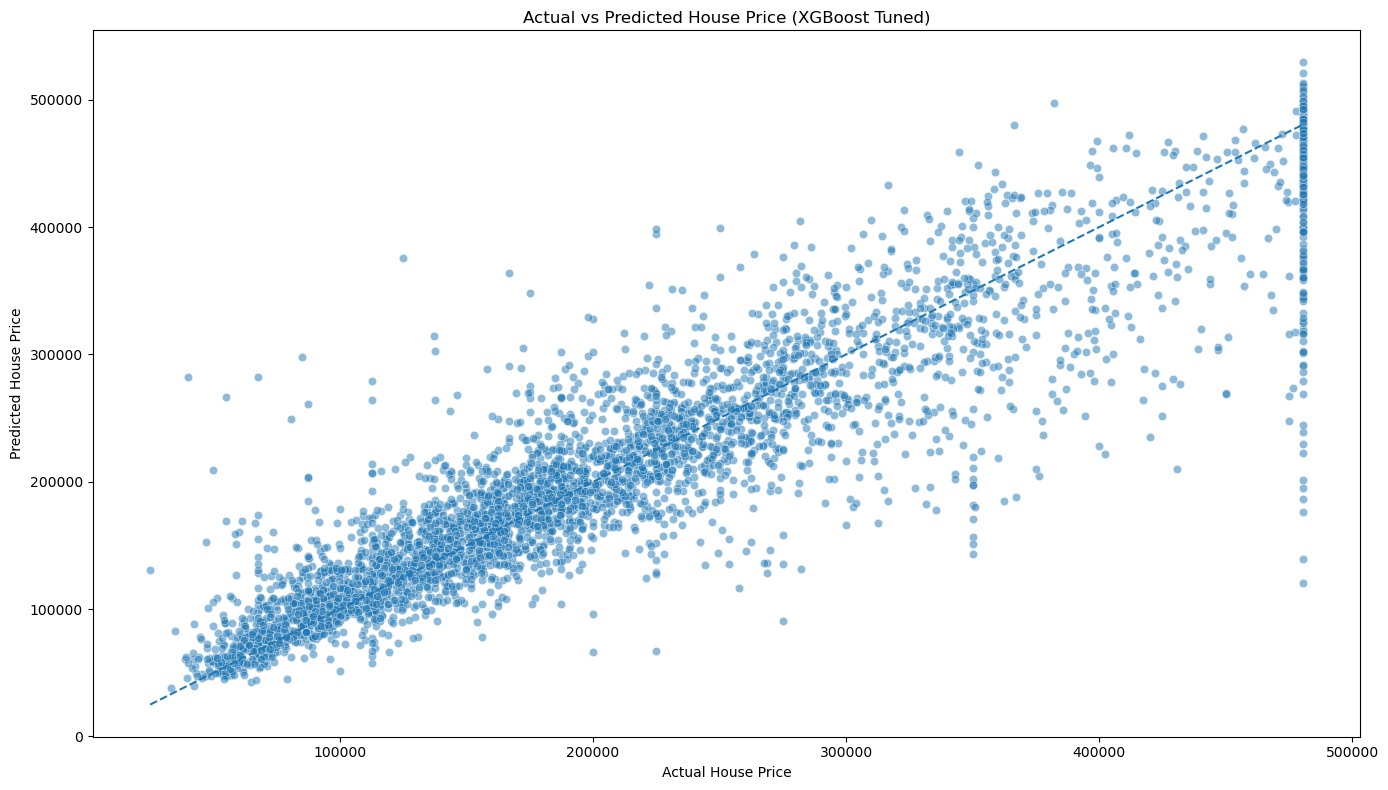

In [ ]:
#Actual vs Predicted (dengan garis ideal)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.title('Actual vs Predicted House Price (XGBoost Tuned)')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.tight_layout()
plt.show()


Distribusi residual (selisih antara nilai aktual dan prediksi) menunjukkan pola yang mendekati distribusi normal dan terpusat di sekitar nilai nol. Hal ini mengindikasikan bahwa secara umum model XGBoost yang telah dituning tidak mengalami bias sistematis, baik dalam bentuk overestimasi maupun underestimasi secara keseluruhan.

Pada visualisasi Actual vs Predicted, sebagian besar titik berada di sekitar garis diagonal, yang menunjukkan bahwa prediksi model cukup akurat pada berbagai rentang harga, khususnya pada segmen harga rendah hingga menengah. Namun, terlihat bahwa pada harga rumah yang lebih tinggi, sebaran residual menjadi lebih lebar. Ini menandakan bahwa variansi error meningkat pada segmen harga tinggi, sehingga model cenderung kurang presisi dalam memprediksi properti dengan harga sangat mahal.

Selain itu, adanya penumpukan titik pada nilai harga aktual mendekati batas maksimum mengindikasikan pengaruh capped value pada target, yang membatasi kemampuan model untuk membedakan variasi harga pada level tertinggi. Secara keseluruhan, residual analysis menunjukkan bahwa model telah bekerja dengan baik dan stabil, meskipun masih memiliki keterbatasan dalam menangani ekstrem harga tinggi.

**Error Analysis per Segment**

In [ ]:
segment_df = X_test.copy()
segment_df['actual'] = y_test.values
segment_df['pred'] = y_pred
segment_df['abs_error'] = (segment_df['actual'] - segment_df['pred']).abs()
segment_df['ape'] = segment_df['abs_error'] / segment_df['actual']  

error_by_ocean = segment_df.groupby('ocean_proximity').agg(
    count=('actual', 'count'),
    MAE=('abs_error', 'mean'),
    MAPE=('ape', 'mean')
).sort_values('MAE', ascending=True)

error_by_ocean


,count,MAE,MAPE
ocean_proximity,,,
INLAND,1325,22277.107170,0.186202
<1H OCEAN,1945,31468.333997,0.142182
NEAR BAY,497,34751.607976,0.165668
NEAR OCEAN,568,36326.554014,0.162404


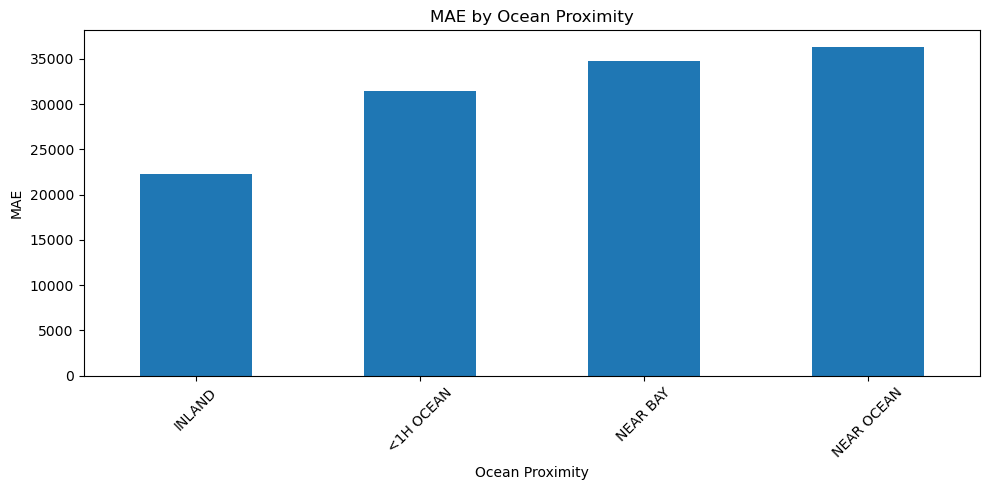

In [69]:
plt.figure(figsize=(10, 5))
error_by_ocean['MAE'].plot(kind='bar')
plt.title('MAE by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
segment_df['price_bin'] = pd.qcut(segment_df['actual'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

error_by_pricebin = segment_df.groupby('price_bin').agg(
    count=('actual', 'count'),
    MAE=('abs_error', 'mean'),
    MAPE=('ape', 'mean')
)

error_by_pricebin


,count,MAE,MAPE
price_bin,,,
Low,1085,19455.083864,0.240756
Mid-Low,1089,21942.582135,0.143078
Mid-High,1077,27927.547100,0.126707
High,1084,49396.588842,0.133163


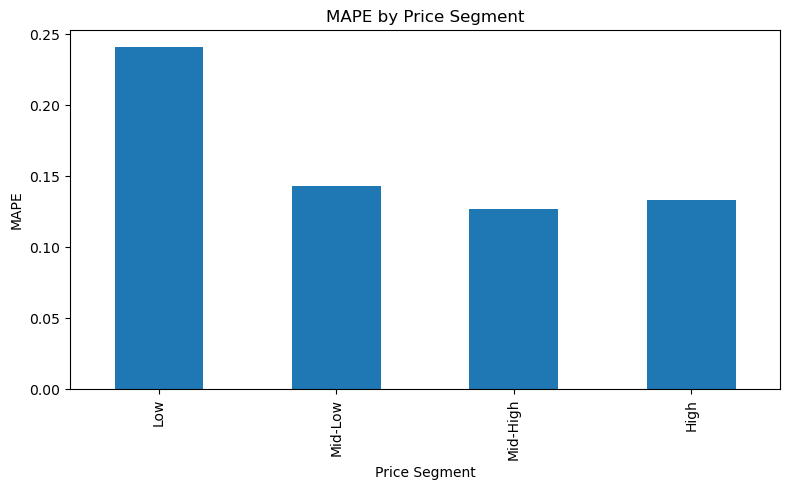

In [72]:
plt.figure(figsize=(8, 5))
error_by_pricebin['MAPE'].plot(kind='bar')
plt.title('MAPE by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('MAPE')
plt.tight_layout()
plt.show()


Berdasarkan analisis error menurut kategori ocean_proximity, model menunjukkan performa terbaik pada wilayah INLAND dengan nilai MAE paling rendah. Hal ini mengindikasikan bahwa harga rumah di wilayah inland cenderung lebih homogen sehingga lebih mudah diprediksi. Sebaliknya, wilayah NEAR OCEAN dan NEAR BAY memiliki nilai MAE yang lebih tinggi, yang menunjukkan bahwa harga rumah di area dekat laut lebih bervariasi dan kompleks, sehingga meningkatkan tingkat kesalahan prediksi model.

Ditinjau dari segmen harga, model memiliki MAPE tertinggi pada segmen harga rendah (Low). Ini menunjukkan bahwa secara persentase, kesalahan prediksi relatif lebih besar pada rumah dengan harga murah, meskipun nilai absolut error (MAE) masih kecil. Pada segmen Mid-Low dan Mid-High, model menunjukkan performa terbaik dengan nilai MAPE paling rendah, menandakan prediksi yang lebih stabil pada rentang harga menengah. Untuk segmen High, nilai MAE meningkat cukup signifikan, yang mengindikasikan bahwa model masih kesulitan memprediksi rumah dengan harga sangat tinggi, meskipun secara persentase error relatif lebih terkendali.

Secara keseluruhan, hasil ini menunjukkan bahwa model paling baik pada segmen harga menengah dan wilayah dengan karakteristik harga yang lebih seragam, sementara performa menurun pada area dekat laut dan properti dengan harga ekstrem.

**Feature Importance**

In [ ]:

# Ambil preprocessor & model dari pipeline
preprocessor = best_xgb.named_steps['preprocessing']
xgb_estimator = best_xgb.named_steps['model']

# Ambil OneHotEncoder
ohe = preprocessor.named_transformers_['OneHot']

# Nama fitur hasil one-hot untuk ocean_proximity
cat_features = ['ocean_proximity']
ohe_feature_names = ohe.get_feature_names_out(cat_features).tolist()

# Nama fitur numerik yang dipass-through
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Nama fitur final sesuai urutan output ColumnTransformer
final_feature_names = ohe_feature_names + num_features

# Feature importance dari XGBoost
importances = xgb_estimator.feature_importances_

# DataFrame awal (masi
fi_raw = pd.DataFrame({
    'feature': final_feature_names,
    'importance': importances
})

# Gabungkan seluruh dummy ocean_proximity jadi satu
mask_ocean = fi_raw['feature'].str.startswith('ocean_proximity_')

ocean_importance = fi_raw.loc[mask_ocean, 'importance'].sum()
fi_numeric = fi_raw.loc[~mask_ocean].copy()

fi_grouped = pd.concat([
    pd.DataFrame({'feature': ['ocean_proximity'], 'importance': [ocean_importance]}),
    fi_numeric
], ignore_index=True).sort_values('importance', ascending=False)

fi_grouped.head(15)


,feature,importance
0,ocean_proximity,0.531788
10,log_median_income,0.213339
11,log_population_per_household,0.056836
2,latitude,0.039791
1,longitude,0.035361
3,housing_median_age,0.024930
8,bedrooms_per_room,0.021479
12,log_rooms_per_household,0.020674
7,households,0.012409
9,bedrooms_per_household,0.011768


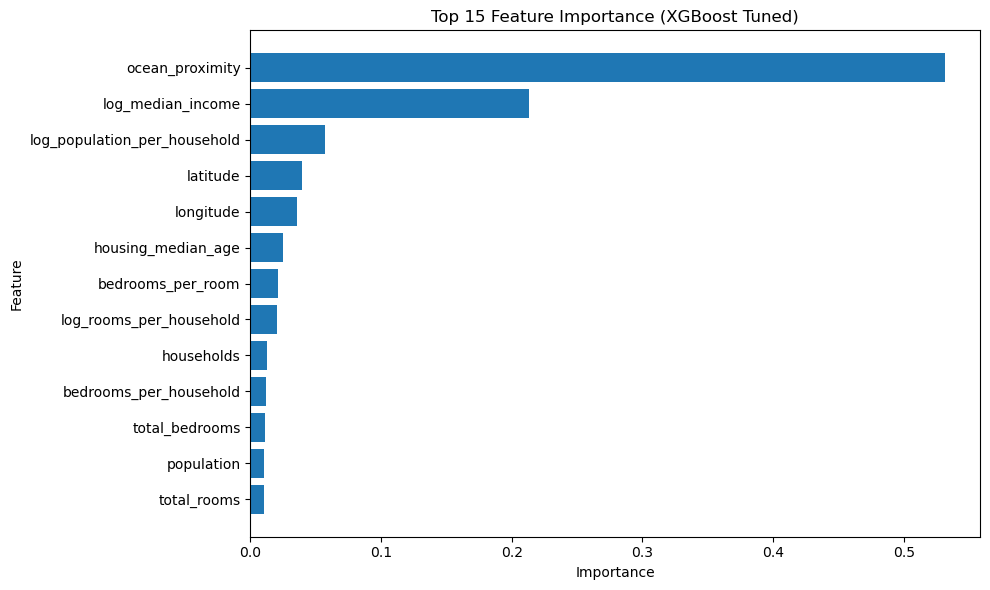

In [77]:
top_n = 15
plot_df = fi_grouped.head(top_n).sort_values('importance')

plt.figure(figsize=(10, 6))
plt.barh(plot_df['feature'], plot_df['importance'])
plt.title(f'Top {top_n} Feature Importance (XGBoost Tuned)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Hasil analisis feature importance menunjukkan bahwa ocean_proximity merupakan faktor paling dominan dalam memengaruhi harga rumah di California, dengan kontribusi lebih dari separuh total importance. Hal ini mengindikasikan bahwa kedekatan properti terhadap laut memiliki peran yang sangat besar dalam menentukan nilai rumah, sejalan dengan temuan pada tahap EDA dan analisis berbasis lokasi.

Fitur log_median_income menempati posisi kedua dengan kontribusi yang signifikan, menunjukkan bahwa tingkat pendapatan penduduk di suatu wilayah merupakan indikator kuat terhadap kemampuan beli dan nilai properti. Selanjutnya, fitur log_population_per_household, serta koordinat geografis latitude dan longitude, juga berkontribusi dalam menangkap perbedaan harga antar wilayah, meskipun pengaruhnya relatif lebih kecil dibandingkan dua fitur utama.

Fitur-fitur yang merepresentasikan karakteristik fisik hunian, seperti housing_median_age, bedrooms_per_room, dan rooms_per_household, memiliki kontribusi yang lebih moderat. Sementara itu, variabel agregat seperti total_rooms, population, dan total_bedrooms menunjukkan pengaruh yang relatif kecil, yang mengindikasikan bahwa faktor lokasi dan kondisi sosial-ekonomi lebih menentukan harga rumah dibandingkan ukuran absolut wilayah sensus.

Secara keseluruhan, hasil ini menegaskan bahwa faktor lokasi dan kondisi ekonomi merupakan penentu utama harga rumah di California, sedangkan karakteristik fisik bangunan berperan sebagai faktor pendukung. Model XGBoost yang telah dituning berhasil menangkap hierarki pengaruh fitur secara konsisten dengan konteks pasar properti.

# Conclusions

Berdasarkan analisis data sensus California tahun 1990 dan penerapan berbagai algoritma regresi, penelitian ini berhasil membangun model prediksi harga rumah yang akurat dan stabil. Dari hasil benchmarking, model berbasis non-linear menunjukkan performa yang lebih baik dibandingkan model linear, yang mengindikasikan bahwa hubungan antara fitur dan harga rumah bersifat kompleks dan tidak sepenuhnya linear.

Model XGBoost yang telah dituning dipilih sebagai model final karena menghasilkan nilai error terendah pada data uji, dengan RMSE sebesar 45.734, MAE sebesar 29.672, dan MAPE sebesar 16,1%. Hasil ini menunjukkan bahwa model mampu melakukan prediksi harga rumah dengan tingkat kesalahan yang masih dapat diterima dalam konteks pasar properti.

Analisis residual menunjukkan bahwa error model terdistribusi secara relatif simetris di sekitar nol tanpa pola bias yang signifikan, meskipun variansi error meningkat pada segmen harga tinggi. Selain itu, analisis feature importance mengungkapkan bahwa faktor lokasi, khususnya kedekatan dengan laut (ocean_proximity), serta kondisi sosial-ekonomi yang direpresentasikan oleh median income, merupakan penentu utama harga rumah di California. Model juga menunjukkan performa terbaik pada segmen harga menengah dan wilayah dengan karakteristik harga yang lebih homogen.

# Recommendations

Model XGBoost yang telah dikembangkan pada penelitian ini menunjukkan performa prediksi yang baik dan stabil, sehingga berpotensi untuk dimanfaatkan sebagai alat bantu pengambilan keputusan dalam penentuan harga rumah. Untuk memastikan manfaat model secara praktis, salah satu langkah lanjutan yang dapat dilakukan adalah melakukan A/B testing. Pada skenario ini, hasil prediksi harga dari model dapat dibandingkan dengan harga yang ditentukan secara konvensional, misalnya berdasarkan pendekatan manual atau estimasi historis. Evaluasi dapat dilakukan dengan mengukur efektivitas model terhadap indikator tertentu, seperti kesesuaian harga dengan pasar atau tingkat ketercapaian harga jual.

Selain itu, terdapat beberapa pendekatan teknis yang dapat dilakukan untuk mengembangkan dan meningkatkan performa model di masa mendatang, antara lain:

1. Analisis Error Ekstrem (Error Profiling)
<br>
Langkah lanjutan yang penting adalah mengidentifikasi prediksi dengan nilai error yang tinggi. Error dapat dikelompokkan ke dalam dua kategori utama, yaitu overestimation dan underestimation. Dari masing-masing kategori, dapat dipilih sekitar 5% error paling ekstrem, sementara 90% sisanya merepresentasikan kelompok mayoritas dengan error mendekati nilai rata-rata. Selanjutnya, hubungan antara error tersebut dengan masing-masing variabel independen dapat dianalisis. Pendekatan ini memungkinkan identifikasi fitur atau karakteristik wilayah tertentu yang menyebabkan kesalahan prediksi tinggi, sehingga dapat menjadi dasar untuk penerapan feature engineering tambahan atau strategi pelatihan ulang model.

2. Penambahan Fitur yang Lebih Representatif
<br>
Jika memungkinkan, performa model dapat ditingkatkan dengan menambahkan fitur yang memiliki korelasi lebih kuat terhadap harga rumah. Contohnya adalah luas bangunan, jarak ke pusat kota, akses terhadap fasilitas publik, atau tingkat kepadatan transportasi. Selain itu, penggunaan data yang lebih terkini juga sangat disarankan, mengingat dataset yang digunakan dalam penelitian ini berasal dari sensus tahun 1990 dan belum merepresentasikan kondisi pasar properti saat ini.

3. Eksplorasi Model yang Lebih Kompleks
<br>
Apabila tersedia data dalam jumlah yang jauh lebih besar dan dengan dimensi fitur yang lebih kaya, penggunaan model yang lebih kompleks seperti neural networks dapat dipertimbangkan. Namun, dengan ukuran dan karakteristik dataset pada penelitian ini, penggunaan model yang lebih kompleks kemungkinan tidak akan memberikan peningkatan performa yang signifikan dibandingkan model ensemble seperti XGBoost.

4. Pengembangan Model Turunan untuk Kebutuhan Lain
<br>
Model yang telah dibangun juga dapat dijadikan dasar untuk pengembangan model prediktif lainnya. Sebagai contoh, model dapat dikembangkan untuk memprediksi perubahan harga rumah seiring waktu atau untuk mengestimasi penyesuaian harga berdasarkan karakteristik sosial-ekonomi tambahan. Jika tersedia data eksternal, seperti persepsi atau penilaian masyarakat terhadap suatu wilayah, informasi tersebut dapat diolah menjadi fitur tambahan untuk meningkatkan akurasi prediksi.

Secara keseluruhan, pengembangan lanjutan dengan pendekatan evaluasi eksperimental, penambahan fitur yang relevan, serta analisis error yang lebih mendalam diharapkan dapat meningkatkan kapabilitas model dan memperluas potensi penerapannya di dunia nyata.

****

**Save Model**

In [78]:
import joblib

# Simpan model final
joblib.dump(best_xgb, 'xgb_california_final_model.pkl')


['xgb_california_final_model.pkl']

In [79]:
# Load model
loaded_model = joblib.load('xgb_california_final_model.pkl')


In [80]:

# Prediksi ulang
y_pred_loaded = loaded_model.predict(X_test)

# Cek RMSE
rmse_loaded = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
rmse_loaded


np.float64(45733.95046103211)